In [1]:
import os
import sys

os.chdir('..')
sys.path.append('src')

In [ ]:
# Remove study from storage

from utilsOptuna import remove_study_from_storage

remove_study_from_storage('sqlite:///optuna/optuna_DL_exercise.db', 'MML_randomforest_data1')

Study 'MML_randomforest_metadata1' not found


In [2]:
# List of studies from a storage

from utilsOptuna import info_studies_from_storage

storage = 'sqlite:///optuna/optuna_DL_exercise.db'
print(f"Storage: {storage}")
info_studies_from_storage(storage)

Storage: sqlite:///optuna/optuna_DL_exercise.db


ValueError: Record does not exist.

In [2]:
# Load study from storage

from utilsOptuna import Study

storage = 'sqlite:///optuna/optuna_DL_exercise.db'
study_name = 'MDL_mmodal3_pre_img1_meta1_emb1'
study_data = Study(storage, study_name)


Loading MDL_mmodal3_pre_img1_meta1_emb1 study...



In [3]:
# Show study config

study_data.show_study_config()

Showing MDL_mmodal3_pre_img1_meta1_emb1 study...
Multimodal: ResNet18 pre + fcnn_pca + metadata
{'random_state': 42,
 'datafile': 'data/poi_dataset.csv',
 'load': <function read_csv at 0x7f4ef78697e0>,
 'preproc_features': <function preprocess_features at 0x7f4ed1dae7a0>,
 'preproc_target': <function preprocess_target at 0x7f4ed1dae680>,
 'split_test': 0.2,
 'proc': {'transform_images': ImagesResNet18Transform(image_path='main_image_path'),
          'transform_embeddings': EmbeddingText(feature='shortDescription', model_name='all-MiniLM-L6-v2'),
          'transform_metadata': ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                 ['xps', 'locationLon', 'locationLat',
                                  'NumTags']),
                                ('categories', MultiLabelBinarizerWrapper(),
                                 ['categories']),
                                ('tier', OneHotEncoder(sparse_output=False),
                             

In [4]:
# Compressed info for each run

study_data.show_runs()


Showing MDL_mmodal3_pre_img1_meta1_emb1 study...


,name_run,start,complete,pruned,fail,total,best_score
0,base_name,2025-10-29 18:47:36,9,1,0,10,0.868
1,extension1_run,2025-10-30 18:12:25,2,3,0,5,0.878


In [5]:
# List of runs for a study (extended version)
study_data.show_runs_extended()


Showing MDL_mmodal3_pre_img1_meta1_emb1 study...

run		start			C/P/F	best
base_name	2025-10-29 18:47:36	9/1/0	0.868
Optimized
{'batch_size': IntDistribution(high=5, log=False, low=2, step=1),
 'lr': FloatDistribution(high=0.5, log=True, low=0.0005, step=None)}
Fixed
{'architecture': {'dropout_rate': 0.75,
                  'embeddings_input': 384,
                  'metadata_input': 20},
 'criterion': {},
 'data_loader': {},
 'optimizer': {}}

run		start			C/P/F	best
extension1_run	2025-10-30 18:12:25	2/3/0	0.878
Optimized
{'batch_size': IntDistribution(high=6, log=False, low=4, step=1),
 'lr': FloatDistribution(high=0.01, log=True, low=0.0001, step=None)}
Fixed
{'architecture': {'dropout_rate': 0.75,
                  'embeddings_input': 384,
                  'metadata_input': 20},
 'criterion': {},
 'data_loader': {},
 'optimizer': {}}


In [3]:
# Best result for study

study_data.show_best_result_study()

Showing MDL_mmodal3_pre_img1_meta1_emb1 study...
Best trial:
  Number:  14
  Value:  0.8782608695652174
  Params: 
    batch_size:	5.00000
    lr:	0.00342


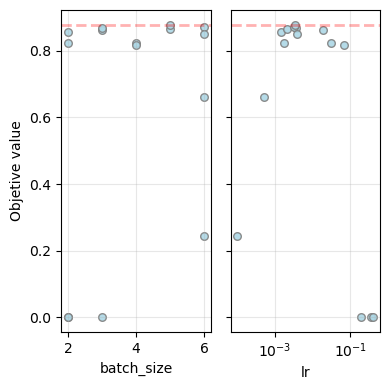

In [7]:
# Plot slice

# TODO Plot 0.0 values and prunned trial as arrow
study_data.plot_slice()

/tmp/ipykernel_74003/3212207595.py:8: ExperimentalWarning: optuna.visualization.matplotlib._contour.plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_contour(study_data.study, params=['batch_size', 'lr']) # 2D contour plot


<Axes: title={'center': 'Contour Plot'}, xlabel='batch_size', ylabel='lr'>

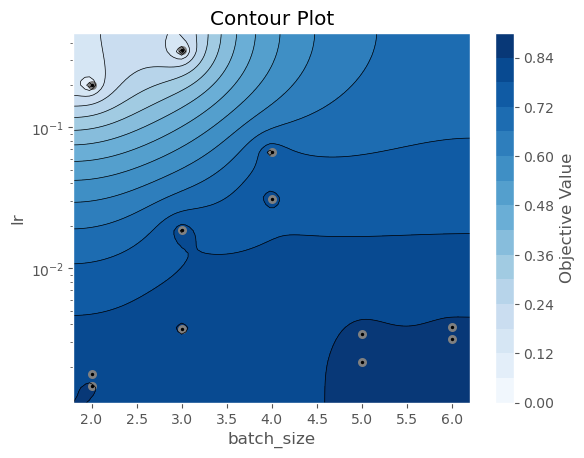

In [8]:
# Plot contour fro two optimized hyperparamters

import optuna

# TODO Plot prunned trial and zero score as red cross
# TODO Highlight best result.
optuna.visualization.matplotlib.plot_contour(study_data.study, params=['batch_size', 'lr']) # 2D contour plot


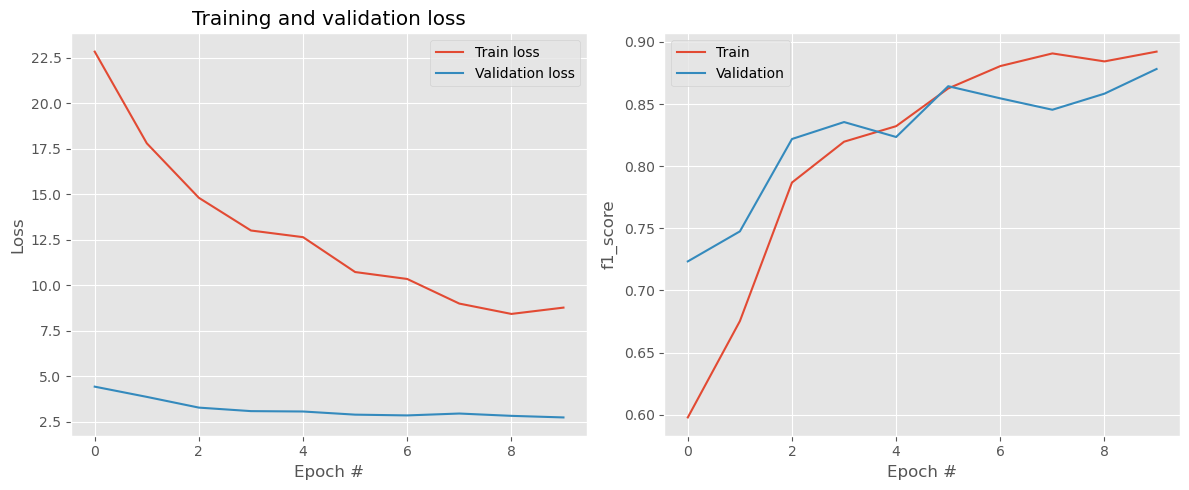

In [3]:
# Plot loss and score by epoch for a trial
study_data.plot_training_curves(14, 'f1_score')

In [10]:
from utilsOptuna import Study

storage = 'sqlite:///optuna/optuna_DL_exercise.db'
study_name = 'MDL_fcnn_shallow_metadata1'
study_data = Study(storage, study_name)

print(study_data.study.best_trial.user_attrs['train_results'].keys())
print(study_data.study.best_trial.user_attrs['val_results'].keys())
print(study_data.study.best_trial.user_attrs['score'])

Loading MDL_fcnn_shallow_metadata1 study...

dict_keys(['loss', 'f1_score', 'sensitivity', 'precision', 'macro_precision', 'confusion_matrix'])
dict_keys(['loss', 'f1_score', 'sensitivity', 'precision', 'macro_precision', 'confusion_matrix'])
f1_score
